# Day 08. Exercise 05
# Clustering

## 0. Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage

## 1. Preprocessing

1. Read the file [`regression.csv`](https://drive.google.com/file/d/1fzOPkuXoxLleOsvNVCT0m-LKxlid33ma/view?usp=sharing) to a dataframe.
2. Remove the `pageviews`, we will cluster the users only by the number of the commits and their average difference.

In [2]:
try:
    df = pd.read_csv('../data/regression.csv')
except FileNotFoundError as e:
    print('File not found')
    raise e

print("Исходный фрейм:")
print(df.head())
# print(f"\nИнформация о данных: {df.info()}")

Исходный фрейм:
       uid  num_commits  pageviews   AVG(diff)
0   user_1           62       28.0  -64.400000
1  user_10           20       89.0  -74.800000
2  user_14           61      143.0 -159.000000
3  user_17           51       47.0  -61.600000
4  user_18            5        3.0   -5.666667


In [3]:
df.drop('pageviews', axis=1, inplace=True)
df

,uid,num_commits,AVG(diff)
0,user_1,62,-64.400000
1,user_10,20,-74.800000
2,user_14,61,-159.000000
3,user_17,51,-61.600000
4,user_18,5,-5.666667
5,user_19,118,-98.750000
6,user_21,65,-95.500000
7,user_25,79,-92.600000
8,user_28,60,-86.400000
9,user_3,18,-105.400000


## 2. KMeans

1. Check the documentation about how this algorithm works.
2. Use this algorithm to create clusters, use `random_state=21` and `n_clusters=3`.
3. Visualize the data on a `scatter plot`.
4. Try different values of `n_clusters` and see how your plot will change.
5. Calculate the `silhouette_score` (check the docs about the metric).

In [4]:
# Выбор признаков для кластеризации: количество коммитов и средняя разница
# X - это матрица признаков для алгоритмов
X = df[['num_commits', 'AVG(diff)']]
X

,num_commits,AVG(diff)
0,62,-64.400000
1,20,-74.800000
2,61,-159.000000
3,51,-61.600000
4,5,-5.666667
5,118,-98.750000
6,65,-95.500000
7,79,-92.600000
8,60,-86.400000
9,18,-105.400000


In [5]:
# Создание и обучение модели K-means с 3 кластерами
# random_state=21 обеспечивает воспроизводимость результатов
kmeans = KMeans(n_clusters=3, random_state=21)
# fit_predict() обучает модель и сразу предсказывает кластеры для всех точек
clusters = kmeans.fit_predict(X)

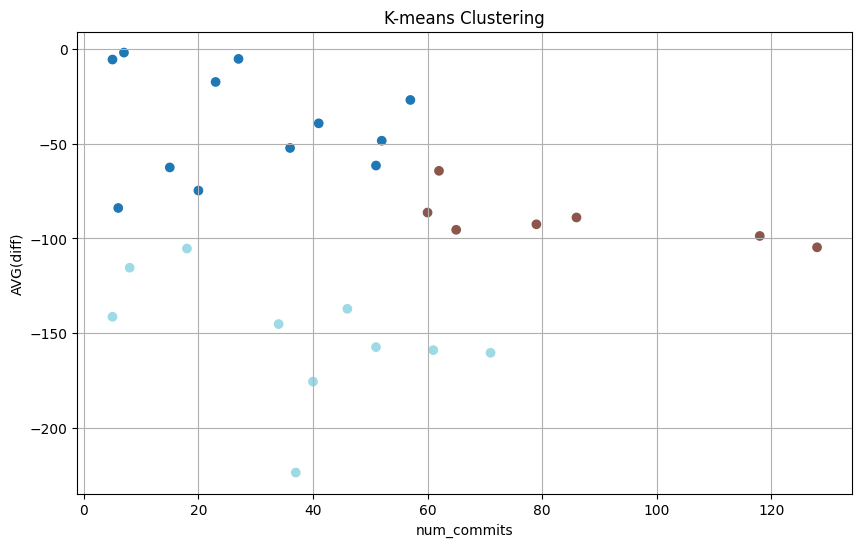

In [6]:
plt.figure(figsize=(10, 6))
# Каждый кластер окрашен в свой цвет (параметр c=clusters)
plt.scatter(X['num_commits'], X['AVG(diff)'], c=clusters, cmap='tab20')
plt.xlabel('num_commits')
plt.ylabel('AVG(diff)')
plt.title('K-means Clustering')
plt.grid(True)
plt.show()

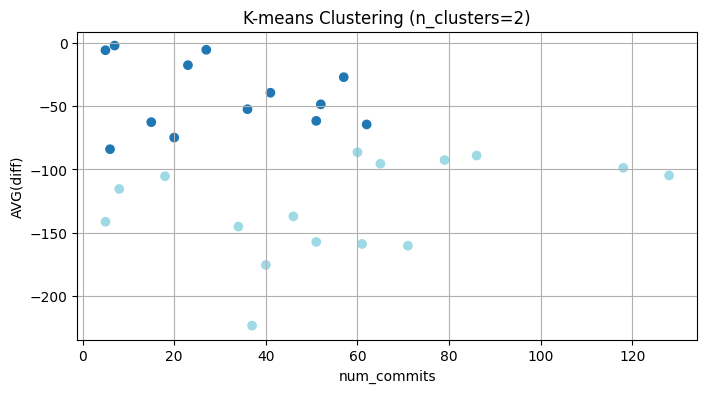

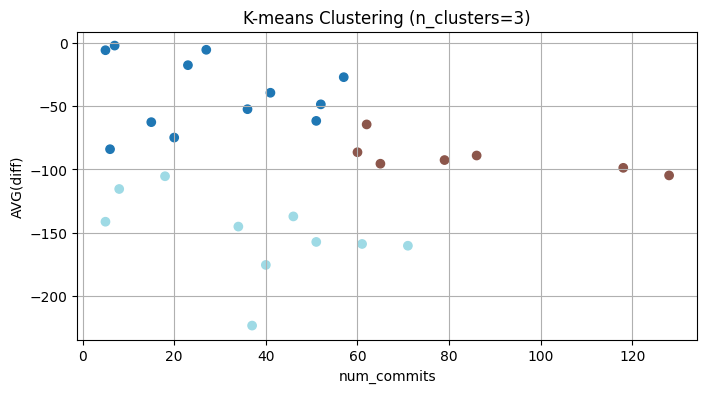

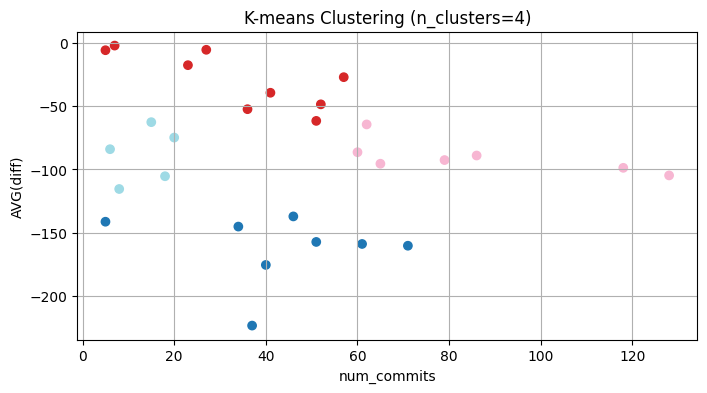

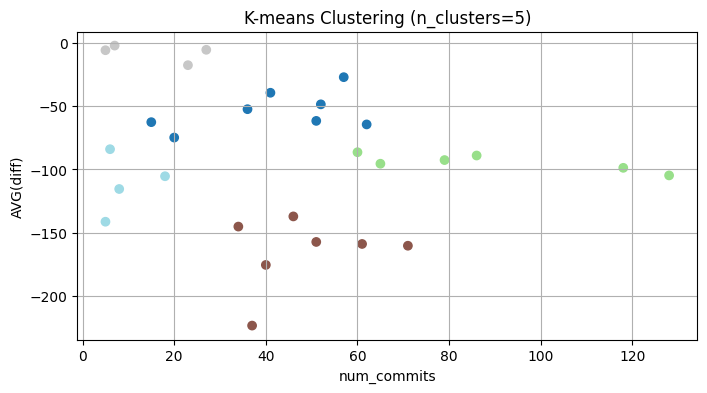

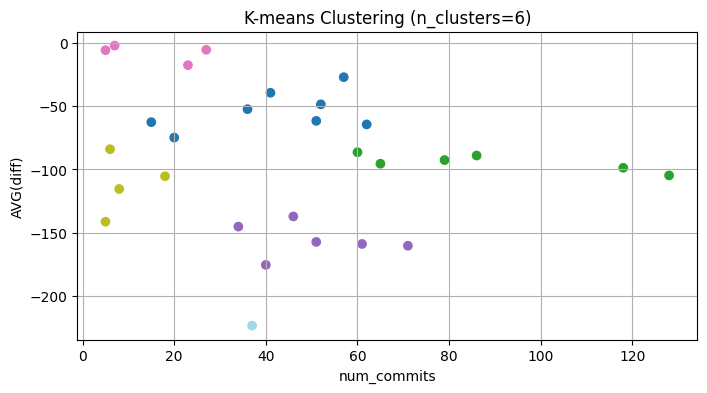

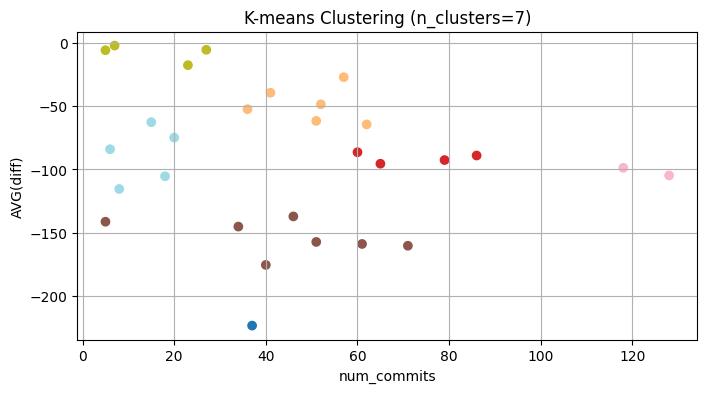

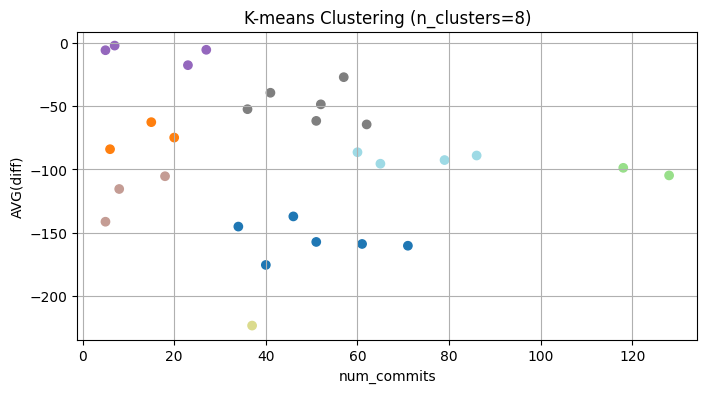

In [7]:
# Тестирование K-means с разным количеством кластеров (от 2 до 8)
# Ищем оптимальное количество кластеров
for n in range(2, 9):
    model = KMeans(n_clusters=n, random_state=21).fit_predict(X)
    
    plt.figure(figsize=(8, 4))
    plt.scatter(X['num_commits'], X['AVG(diff)'], c=model, cmap='tab20')
    plt.xlabel('num_commits')
    plt.ylabel('AVG(diff)')
    plt.title(f'K-means Clustering (n_clusters={n})')
    plt.grid(True)
    plt.show()

In [8]:
# Вычисление метрики качества кластеризации Silhouette Score
# Значения от -1 до 1, чем выше - тем лучше качество кластеризации
silhouette_score(X, kmeans.labels_)

0.43901709571532954

## 3. DBSCAN

1. Check the documentation about how this algorithm works.
2. Use this algorithm to create clusters with `eps=20` and `min_samples=2`.
3. Visualize the data on a `scatter plot`.
4. Try different values of `eps` and `min_samples` and see how your plot will change.
5. Calculate the `silhouette_score` (check the docs about the metric).

In [9]:
# Создание модели DBSCAN (Density-Based Spatial Clustering)
# eps=20 - максимальное расстояние между точками в одном кластере
# min_samples=2 - минимальное количество точек для формирования кластера
dbscan = DBSCAN(eps=20, min_samples=2)
clusters = dbscan.fit_predict(X)

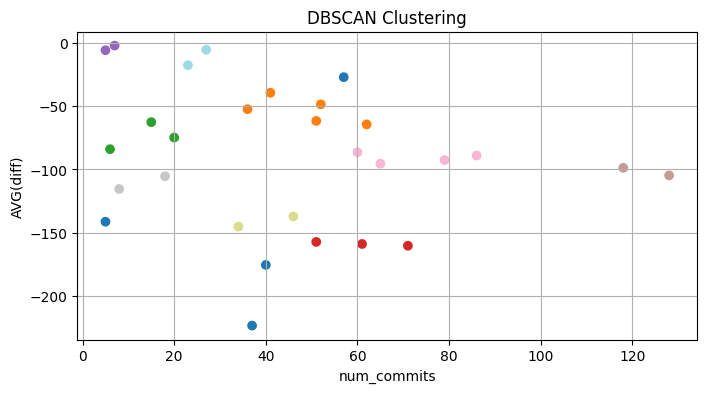

In [10]:
plt.figure(figsize=(8, 4))
plt.scatter(X['num_commits'], X['AVG(diff)'], c=clusters, cmap='tab20')
plt.xlabel('num_commits')
plt.ylabel('AVG(diff)')
plt.title(f'DBSCAN Clustering')
plt.grid(True)
plt.show()

In [11]:
# Подготовка диапазонов параметров для тестирования DBSCAN
eps1 = [i for i in range(10, 31, 10)]
min_samples1 = [i for i in range(2, 5)]

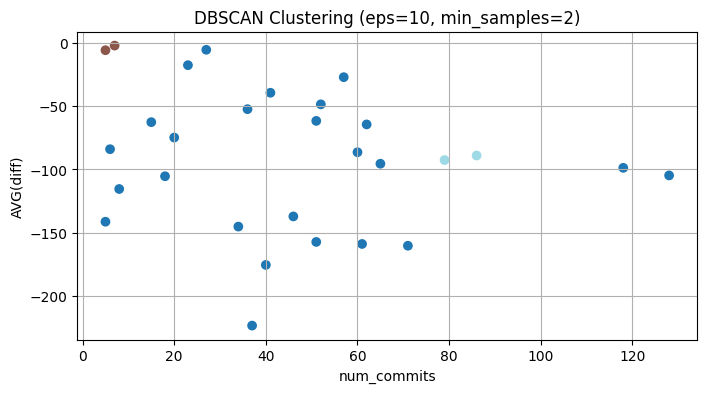

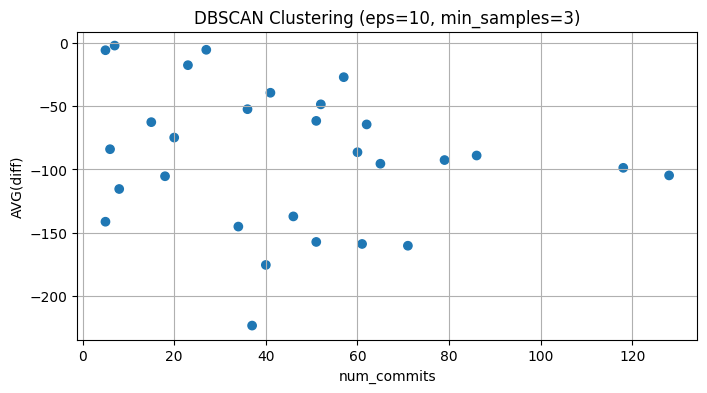

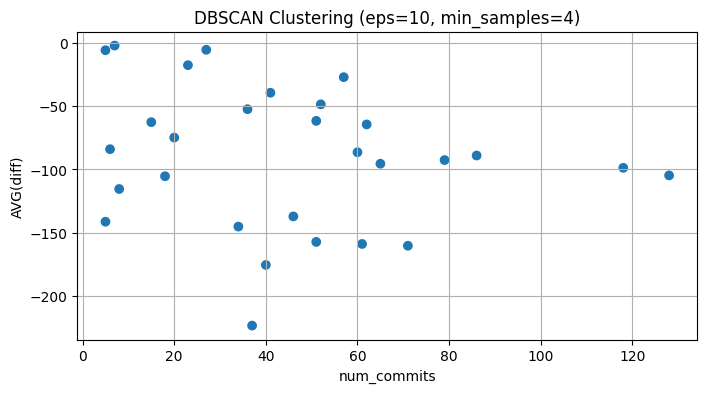

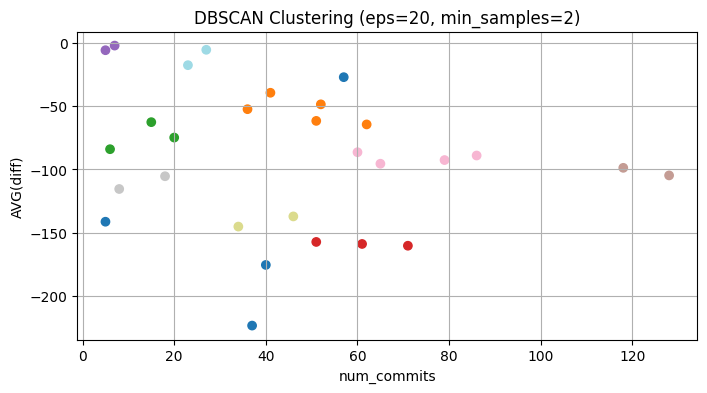

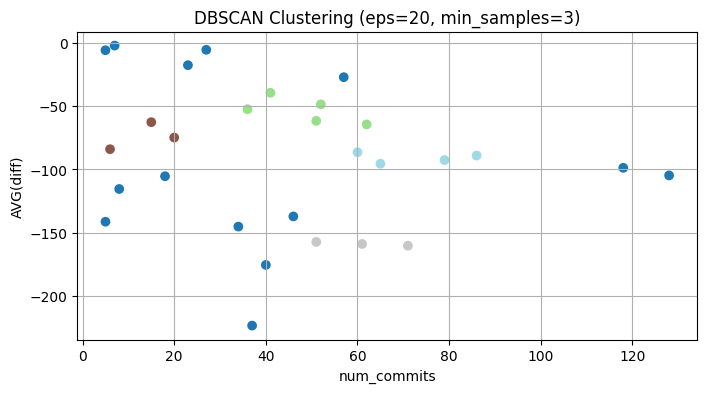

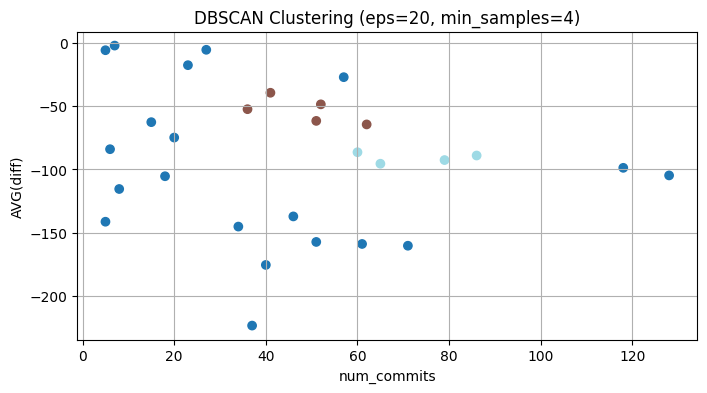

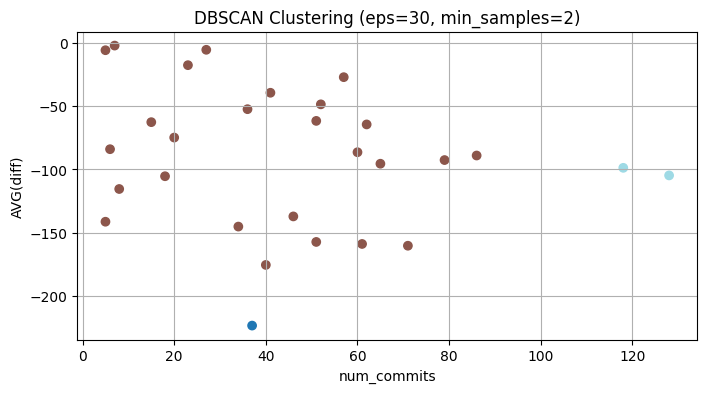

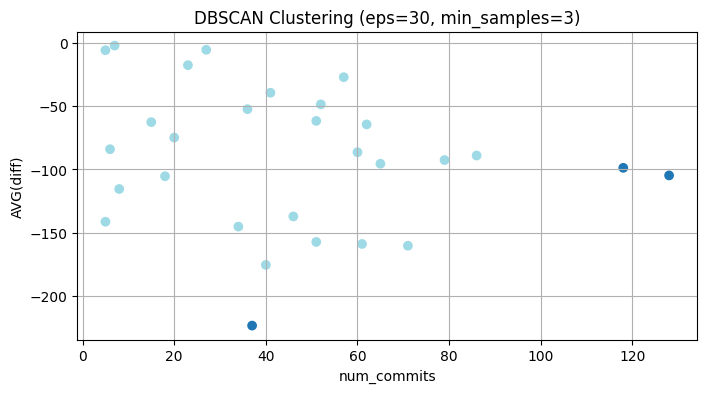

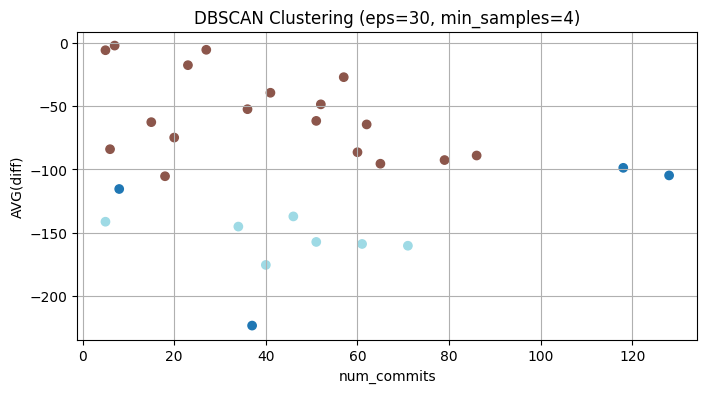

In [12]:
# Перебор всех комбинаций параметров eps и min_samples для DBSCAN
# Ищем оптимальные параметры алгоритма
for eps in eps1:
    for min_samples in min_samples1:
        db = DBSCAN(eps=eps, min_samples=min_samples)
        db_clusters = db.fit_predict(X)
        plt.figure(figsize=(8, 4))
        plt.scatter(X['num_commits'], X['AVG(diff)'], c=db_clusters, cmap='tab20')
        plt.xlabel('num_commits')
        plt.ylabel('AVG(diff)')
        plt.title(f'DBSCAN Clustering (eps={eps}, min_samples={min_samples})')
        plt.grid(True)
        plt.show()

In [13]:
try:
    print(silhouette_score(X, clusters))
except:
    print("Something went wrong")

0.38339641455696605


## 4. Hierarchical (AgglomerativeClustering)

1. Use this algorithm to create clusters with `n_clusters=5`.
2. Visualize the data on a `scatter plot`.
3. Try different values of `n_clusters` and see how your plot will change.
4. Calculate the `silhouette_score`.
5. Visualize the `dendrogram`.

In [14]:
# Создание модели иерархической кластеризации (Agglomerative Clustering)
# Работает по принципу "снизу вверх" - объединяет ближайшие кластеры
agg = AgglomerativeClustering(n_clusters=5)
clusters = agg.fit_predict(X)

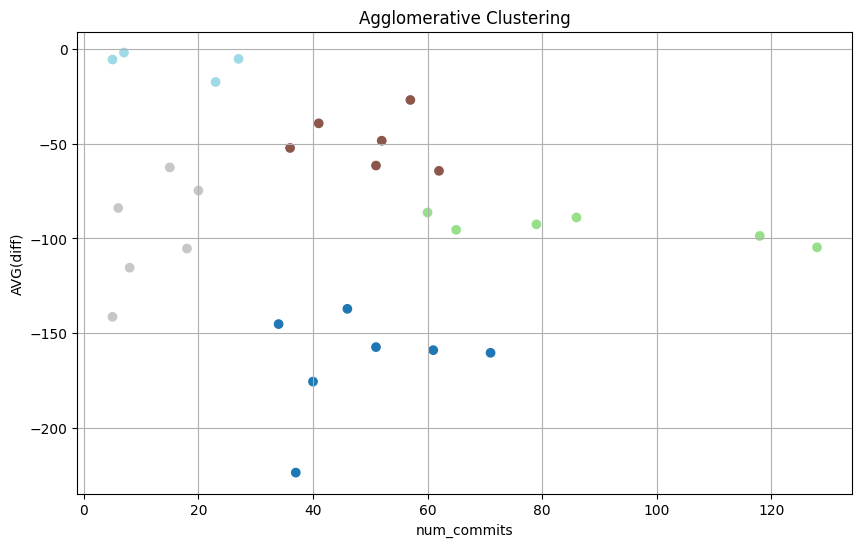

In [15]:
plt.figure(figsize=(10, 6))
plt.scatter(X['num_commits'], X['AVG(diff)'], c=clusters, cmap='tab20')
plt.xlabel('num_commits')
plt.ylabel('AVG(diff)')
plt.title(f'Agglomerative Clustering')
plt.grid(True)
plt.show()

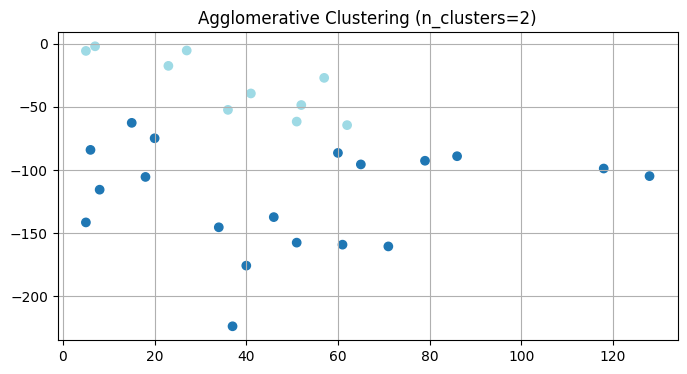

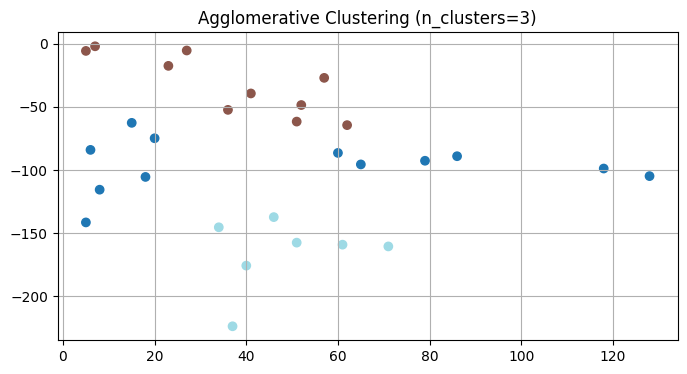

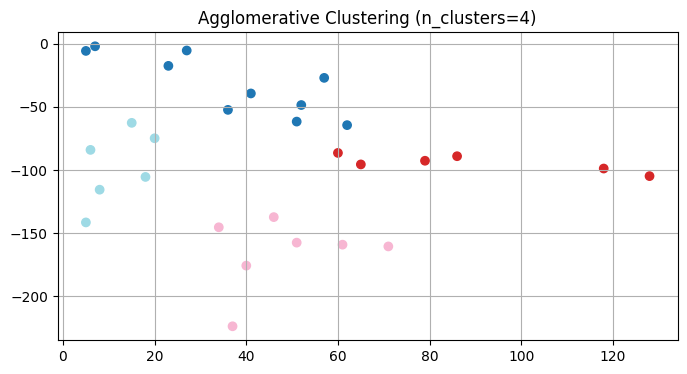

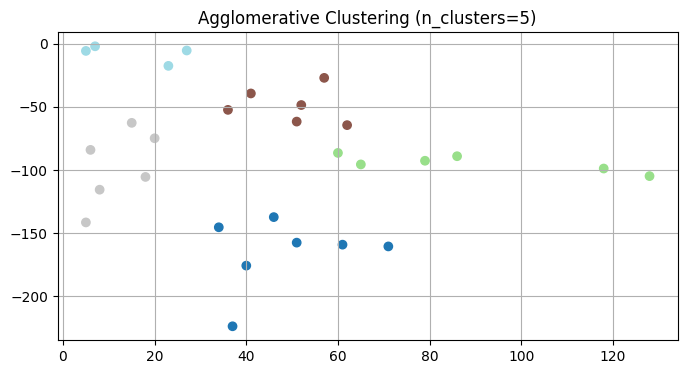

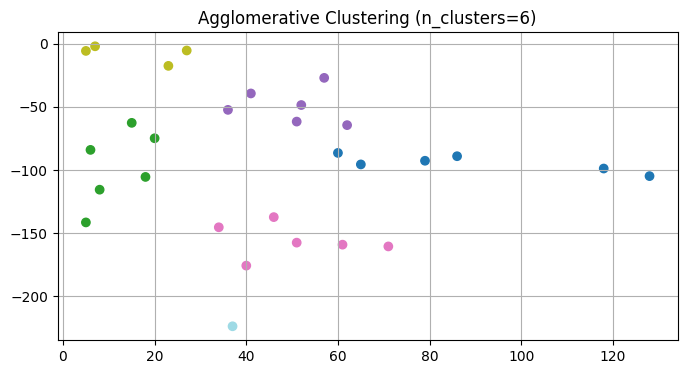

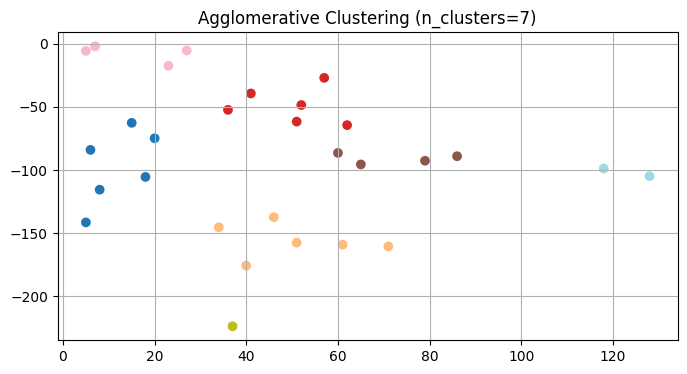

In [16]:
# Тестирование Agglomerative Clustering с разным количеством кластеров
# Позволяет выбрать оптимальное количество кластеров
for n in range(2, 8, 1):
    agg_tmp = AgglomerativeClustering(n_clusters=n)
    agg_clusters = agg_tmp.fit_predict(X)
    
    plt.figure(figsize=(8, 4))
    plt.scatter(X['num_commits'], X['AVG(diff)'], c=agg_clusters, cmap='tab20')
    plt.title(f'Agglomerative Clustering (n_clusters={n})')
    plt.grid(True)
    plt.show()

In [17]:
# Вычисление Silhouette Score для последней модели Agglomerative Clustering
silhouette_score(X, clusters)

0.46383015199381467

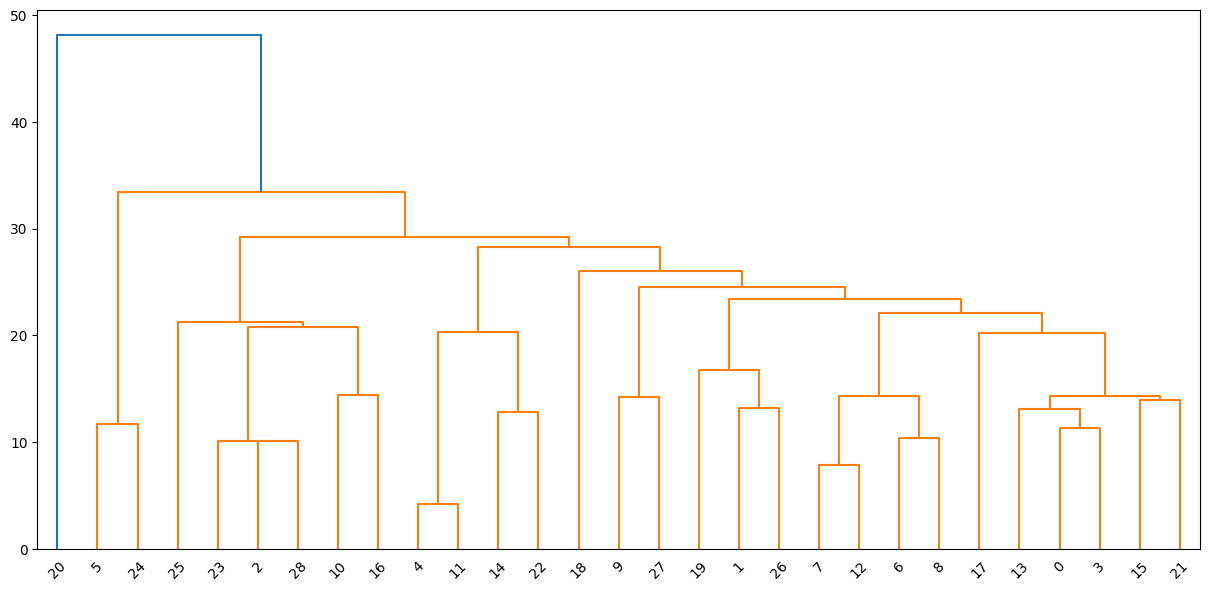

In [18]:
# Построение дендрограммы - дерева объединения кластеров
# Показывает как алгоритм постепенно объединял точки в кластеры
plt.figure(figsize=(15, 7))
Z = linkage(X)
dendrogram(Z)
plt.show()

## 5. Function

Write a function that:
1. Takes as arguments: model class of clustering, its parameters, the name of the parameter for optimization, the range of the parameter values to try.
2. Tries different values from the given parameter range and calculates the `silhouette_score` for each value from the range.
3. Finds out the best value for the parameter in the range.
4. Returns two subplots:


- - the first shows how the `silhouette_score` changes depending on the value of the parameter,
- - the second visualizes the data on a `scatter plot` using the clustering model with the best value of the parameter.

In [19]:
# функция для автоматического подбора оптимальных параметров
# Тестирует разные значения одного параметра и находит лучший по Silhouette Score
def plotting(model_class, base_params, param_name, param_range):
    scores = []
    best_score = -1
    best_value = None
    best_clusters = None

    # Перебор всех значений параметра
    for value in param_range:
        params = base_params.copy()
        params[param_name] = value
        model = model_class(**params)

        # Обучение модели и вычисление качества
        try:
            clusters = model.fit_predict(X)
            score = silhouette_score(X, clusters)
        # Если кластеризация не удалась ставим оценку минус 1
        except:
            score = -1
        
        scores.append(score)

        # Обновление лучшего результата
        if score > best_score:
            best_score = score
            best_value = value
            best_clusters = clusters

    # Создание двух графиков: зависимость качества от параметра и лучшая кластеризация
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

    # График зависимости Silhouette Score от параметра
    ax1.plot(param_range, scores, 'bo-', markersize=8)
    ax1.set_xlabel(param_name)
    ax1.set_ylabel('Silhouette Score')
    ax1.set_title(f'Silhouette Score Change In {model_class} Of {param_name}')
    ax1.axvline(x=best_value, color='r', linestyle='--')
    ax1.grid(True)

    # График лучшей кластеризации
    scatter = ax2.scatter(X['num_commits'], X['AVG(diff)'], 
                         c=best_clusters, cmap='tab20')
    ax2.set_xlabel('num_commits')
    ax2.set_ylabel('AVG(diff)')
    ax2.set_title(f'Best Clustering; Silhouette: {best_score}')
    ax2.grid(True)
    return fig

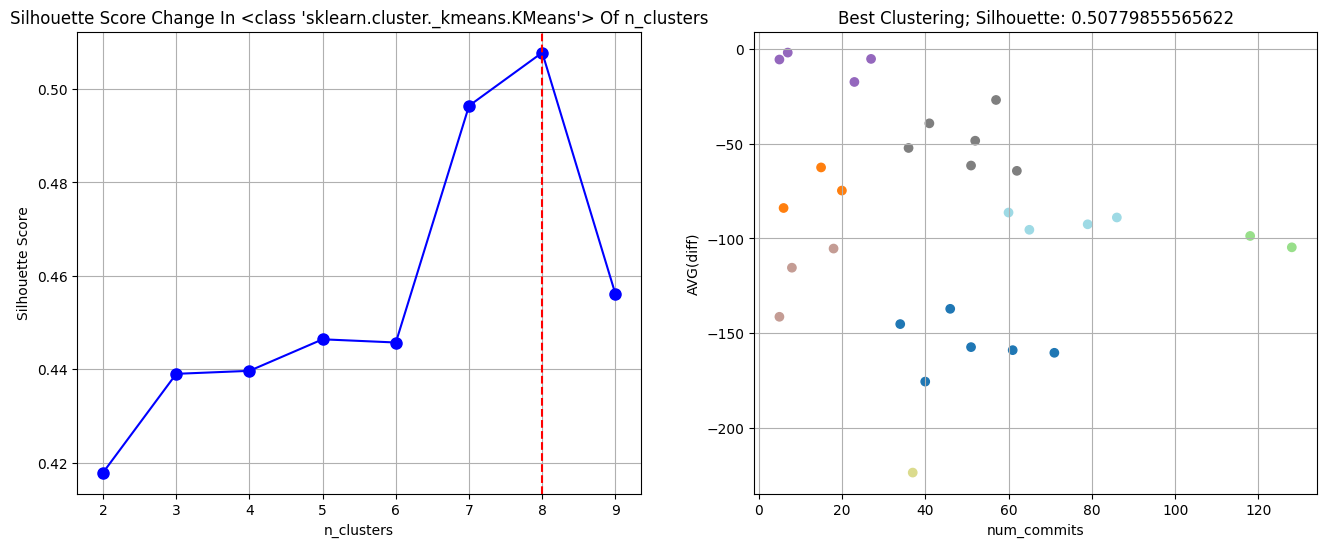

In [20]:
# Поиск оптимального количества кластеров для K-means
base_params = {'random_state': 21}
fig = plotting(KMeans, base_params, 'n_clusters', range(2, 10)) # Базовые параметры (фиксированное зерно)
plt.show()

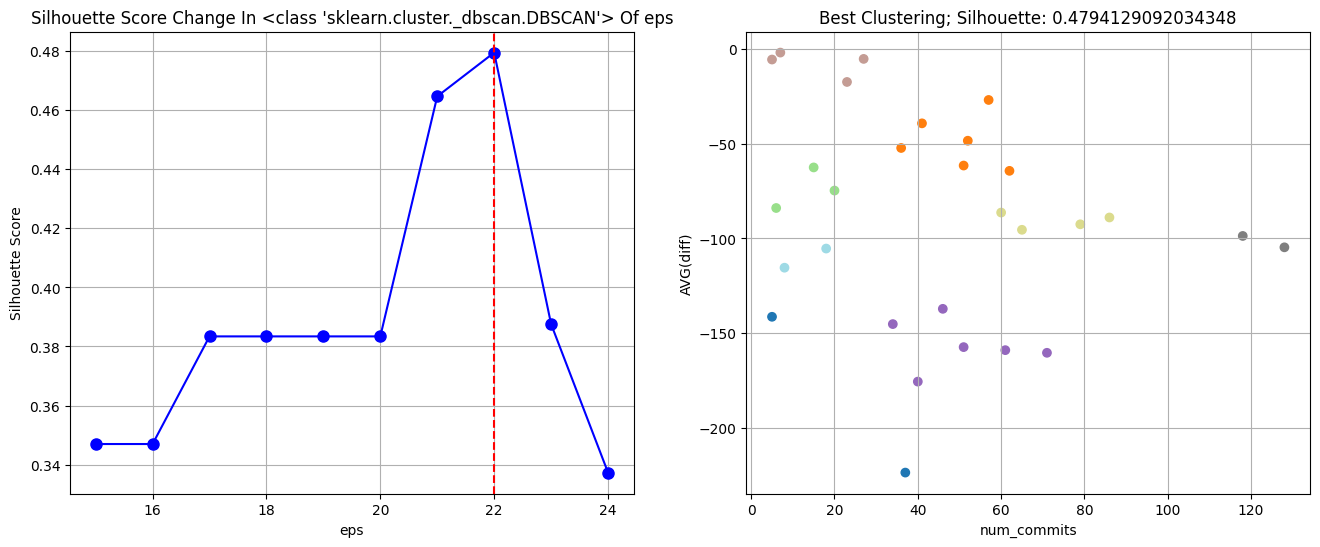

In [21]:
base_params = {'min_samples': 2}
fig = plotting(DBSCAN, base_params, 'eps', range(15, 25))
plt.show()

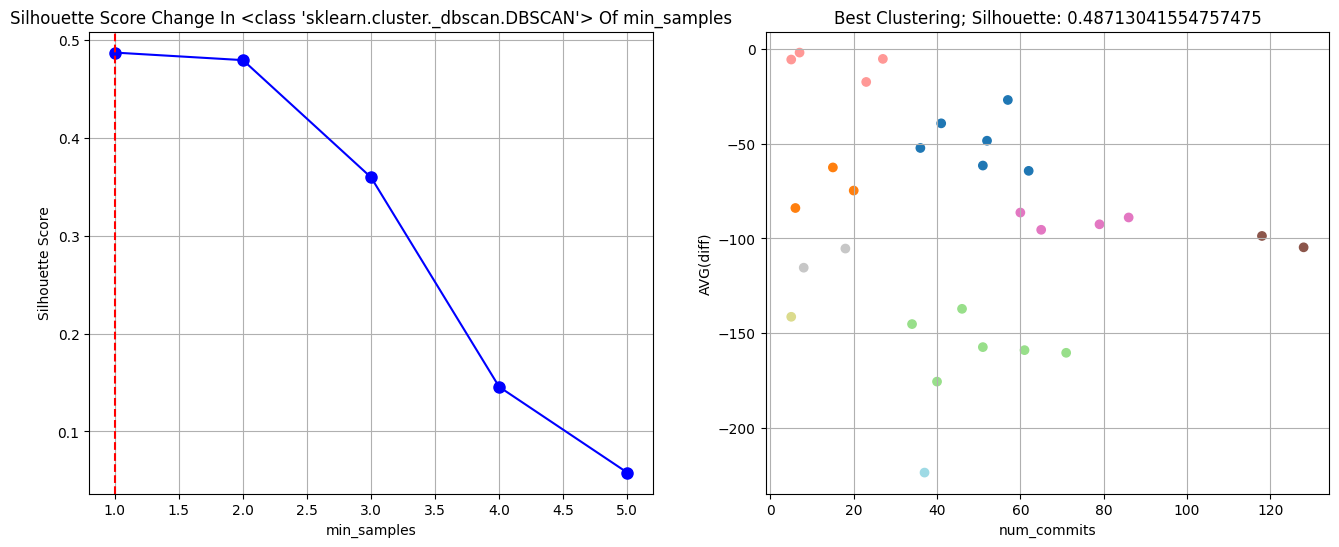

In [22]:
base_params = {'eps': 22}
fig = plotting(DBSCAN, base_params, 'min_samples', range(1, 6))
plt.show()

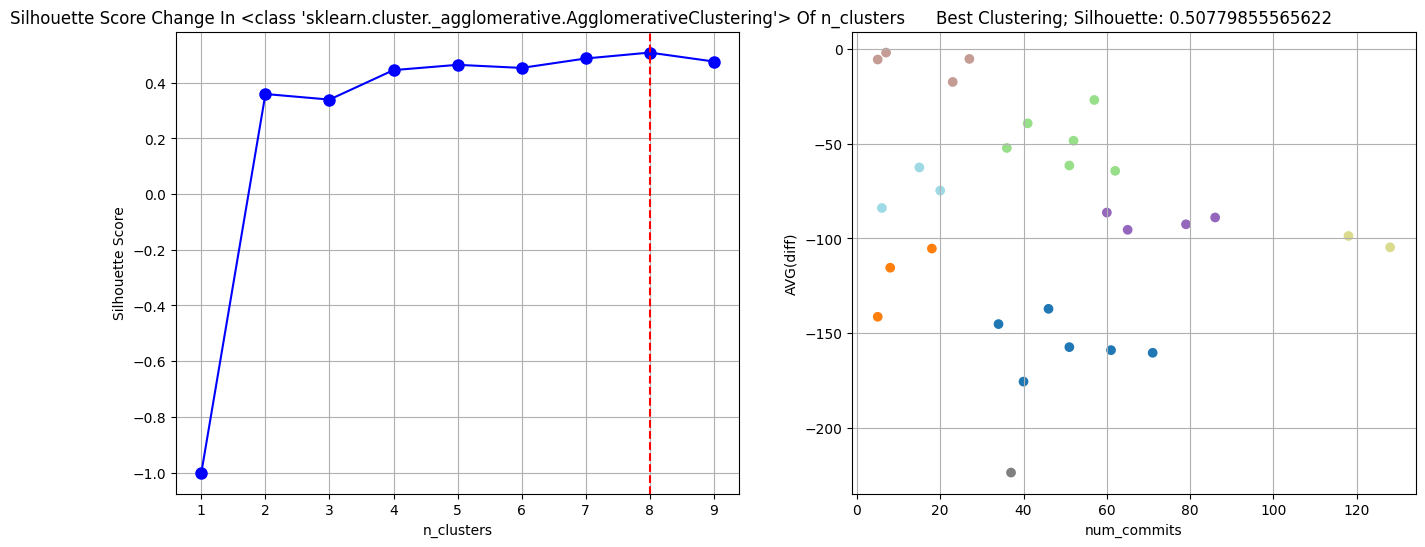

In [23]:
base_params = {} # Нет дополнительных базовых параметров
fig = plotting(AgglomerativeClustering, base_params, 'n_clusters', range(1, 10))
plt.show()